1.   Importação das bibliotecas que serã utilizadas
  *   Pandas
  *   Matplotlib

2.   Upload do arquivo com a Base de dados
  *   fonte do arquivo: https://github.com/microsoft/powerbi-desktop-samples/tree/main/AdventureWorks%20Sales%20Sample

3.   Criação do Dataframe

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-1-c7b5f96b1f6a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [15]:
#upload do arquivo -
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [16]:
# Criando o Data Frame
df = pd.read_excel("AdventureWorks.xlsx")

In [17]:
# visualizando 10 linhas aleatórias
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
131,2008-05-14,2008-05-20,306,366,19052,200805143CS576,348.58,758.00,6,0.000,4548.000,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black
758,2008-09-04,2008-09-16,199,2497,18868,200809045CS688,5.09,9.99,144,143.856,1294.704,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
72,2008-10-20,2008-10-31,307,1202,19107,200810204CS646,330.66,998.00,6,0.000,5988.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
508,2008-01-17,2008-01-26,199,1226,18815,200801174CS559,330.99,999.00,10,499.500,9490.500,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.000,4548.000,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [18]:
# verificando os tipos de dados das colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [19]:
# Tamanho de linhas e colunas da base
df.shape

(904, 16)

4.   Calculos de custos, receitas e lucro

In [21]:
# qual é a receita total
round(df["Valor Venda"].sum(),2)

5984606.14

In [22]:
# Qual é o custo total - Criando nova coluna
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [23]:
df.sample(6)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
211,2009-05-19,2009-05-30,306,1226,19067,200905194CS746,330.99,999.0,18,0.00,17982.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,5957.82
414,2008-04-27,2008-05-02,306,1178,19051,200804274CS567,330.66,998.0,14,978.04,12993.96,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,4629.24
666,2009-03-02,2009-03-15,199,1203,18919,200903024CS827,324.69,980.0,5,245.00,4655.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1623.45
108,2008-10-11,2008-10-21,307,1155,19106,200810114CS637,324.69,980.0,6,0.00,5880.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14
576,2008-06-21,2008-06-25,307,1178,19100,200806214CS596,330.66,998.0,8,798.40,7185.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,2645.28
524,2009-10-11,2009-10-20,306,1202,19075,200910114CS765,330.66,998.0,4,798.40,3193.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1322.64


In [24]:
# Qual é o custo total?
round(df['custo'].sum(),2)

2486783.05

In [26]:
# Qual é o lucro? Criando nova coluna com base nas colunas Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["custo"]

In [27]:
df.sample(6)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro
427,2009-11-28,2009-12-03,199,366,19021,200911283CS936,348.58,758.00,9,1364.400,5457.600,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,3137.22,2320.380
709,2009-01-21,2009-01-26,306,2496,19061,200901215CS736,5.09,9.99,192,383.616,1534.464,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,977.28,557.184
495,2008-11-05,2008-11-17,307,1226,19108,200811054CS648,330.99,999.00,25,3746.250,21228.750,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,8274.75,12954.000
730,2009-11-13,2009-11-17,307,2496,19140,200911135CS730,5.09,9.99,312,467.532,2649.348,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,1588.08,1061.268
359,2009-03-28,2009-04-10,307,1202,19119,200903284CS709,330.66,998.00,15,2994.000,11976.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4959.90,7016.100
839,2008-12-14,2008-12-19,307,1203,19111,200812144CS669,324.69,980.00,6,882.000,4998.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,3049.860


In [29]:
# Total de Lucro
round(df["Lucro"].sum(),2)

3497823.09

5.   Manipulação de datas

In [32]:
# Criando coluna com tolta de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df['Data Venda']
df.sample(4)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
504,2008-06-18,2008-06-22,307,1226,19100,200806184CS596,330.99,999.0,7,699.3,6293.7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2316.93,3976.77,4 days
512,2008-02-26,2008-03-05,307,1226,19094,200802264CS549,330.99,999.0,10,1998.0,7992.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3309.90,4682.10,8 days
422,2009-10-21,2009-10-30,306,1155,19075,200910214CS765,324.69,980.0,9,1764.0,7056.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,2922.21,4133.79,9 days
154,2008-06-23,2008-07-05,199,384,18848,200806233CS620,348.58,758.0,12,0.0,9096.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4182.96,4913.04,12 days


Calcular a média de tempo de envia para cada marca

1.   Item da lista
2.   Item da lista



In [33]:
# é necessário extrair apenas os dias na coluna "Tempo Envio"
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.sample(4)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
707,2009-01-06,2009-01-11,306,2496,19061,200901065CS736,5.09,9.99,192,383.616,1534.464,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,977.28,557.184,5
59,2008-06-25,2008-07-08,199,1203,18849,200806254CS625,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,3931.860,13
410,2008-02-05,2008-02-18,199,1178,18819,200802054CS570,330.66,998.00,11,548.900,10429.100,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,3637.26,6791.840,13
582,2008-09-26,2008-10-04,199,1202,18874,200809264CS695,330.66,998.00,8,798.400,7185.600,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2645.28,4540.320,8


In [34]:
# veridicando os tipos de dados das colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
Lucro                    float64
Tempo_envio                int64
dtype: object

In [35]:
# Calculando a média de tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [36]:
# Verificação de valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
Lucro             0
Tempo_envio       0
dtype: int64

6.   Calculo de lucro por agrupamento
  *   Lucro por marca
  

In [41]:
#1. Agrupar por ano e marca
pd.options.display.float_format = '{:20,.2f}'.format # Formatando o valor para não mostrar notação científica
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [43]:
# armazenando os dados do agrupamento para uma tabela - reset_index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [44]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

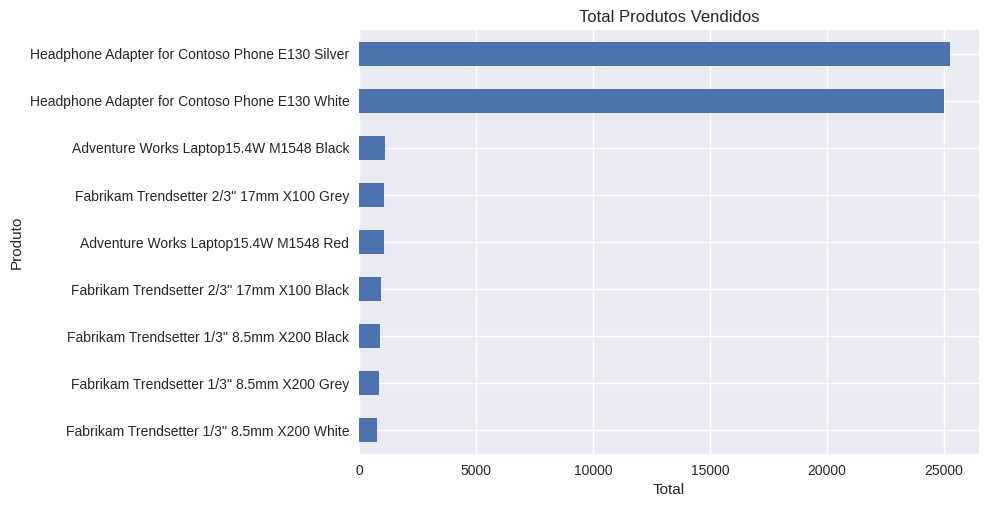

In [45]:
# Gráfico com o Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

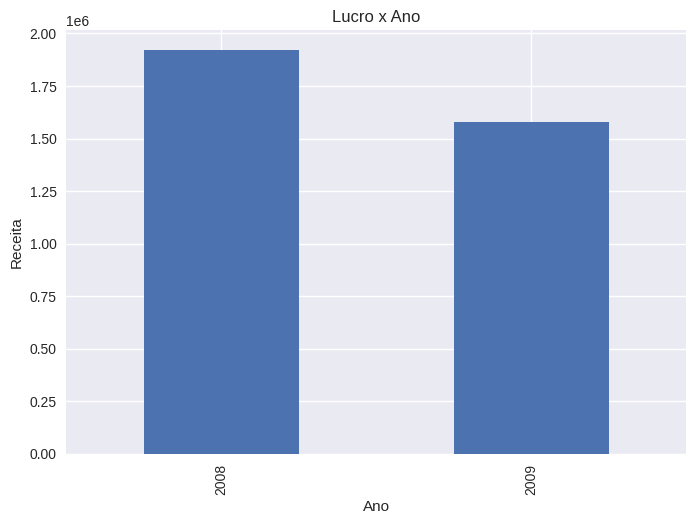

In [46]:
# Gráfico de lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

7.   Analise das vendas de 2009

In [47]:
# realizando filtro dos dados para o ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.sample(4)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
815,2009-10-12,2009-10-21,306,384,19075,200910123CS765,348.58,758.00,6,909.60,"3,638.40",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","1,546.92",9
387,2009-11-04,2009-11-09,199,1203,19011,200911044CS926,324.69,980.00,9,"1,764.00","7,056.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"2,922.21","4,133.79",5
844,2009-04-11,2009-04-15,307,1203,19120,200904114CS710,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"1,948.14","2,755.86",4
813,2009-03-17,2009-03-29,307,384,19118,200903173CS708,348.58,758.00,6,909.60,"3,638.40",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","1,546.92",12


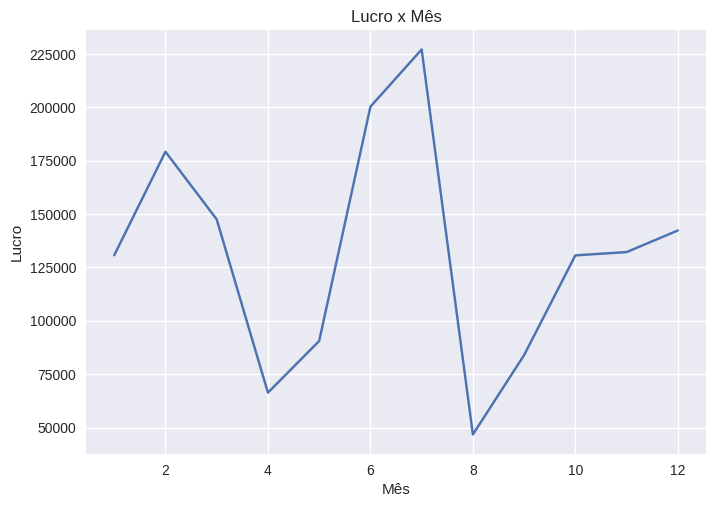

In [48]:
# Gráfico para visualização de lucro por mês
df_2009.groupby(df_2009["Data Venda"].dt.month)['Lucro'].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

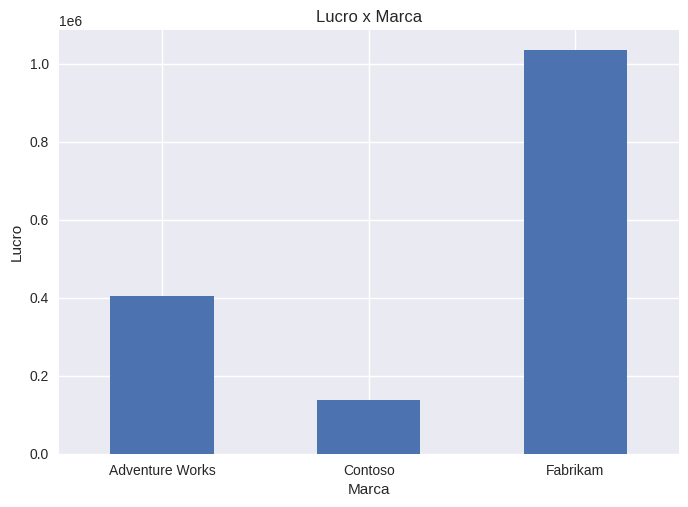

In [50]:
# Grafico de lucro por marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); # Legenda do eixo x na horizontal

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

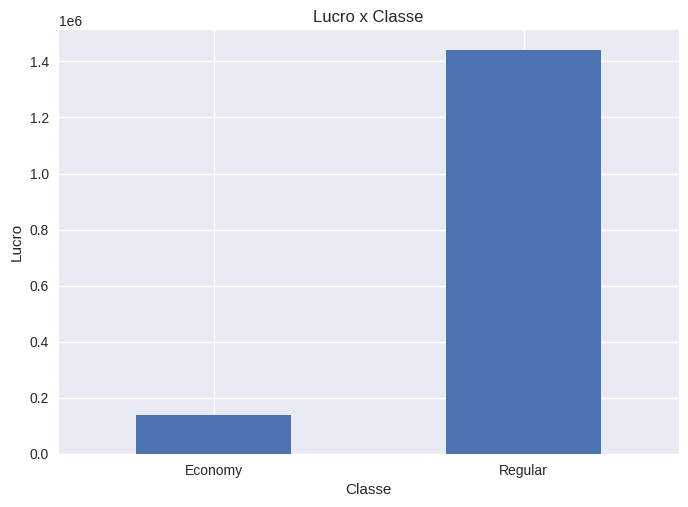

In [52]:
# Gráfico para lucro por classe
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

8.  Análise estatística de Tempo

In [53]:
# Análise estatística
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

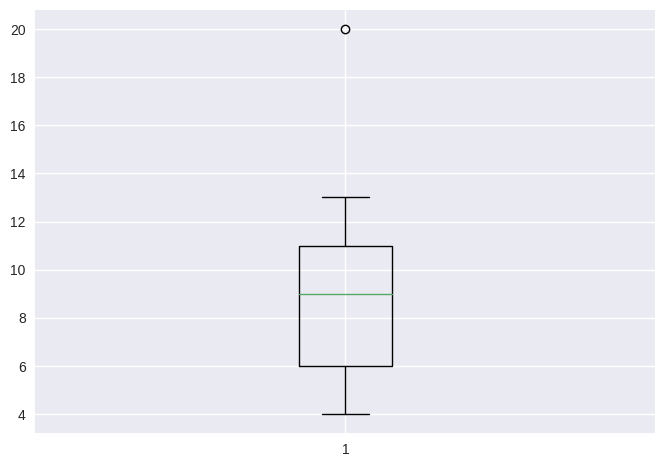

In [57]:
# Grafico de boxplot
plt.boxplot(df["Tempo_envio"]);

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

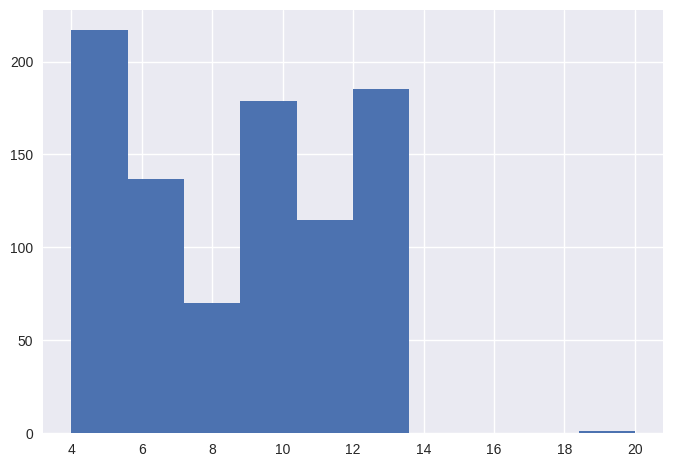

In [59]:
# Histograma
plt.hist(df["Tempo_envio"])

In [61]:
# Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [62]:
# Tempo máximo de envio
df["Tempo_envio"].max()

20

In [63]:
# Identificado o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
